In [13]:
import pandas as pd

df = pd.read_csv("sales.csv")
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   order_id  149116 non-null  int64         
 1   date      149116 non-null  datetime64[ns]
 2   store     149116 non-null  object        
 3   product   149116 non-null  object        
 4   quantity  149116 non-null  int64         
 5   sales     149116 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 6.8+ MB
None
   order_id       date            store                product  quantity  \
0         1 2023-01-01  Lower Manhattan  Gourmet brewed coffee         2   
1         2 2023-01-01  Lower Manhattan        Brewed Chai tea         2   
2         3 2023-01-01  Lower Manhattan          Hot chocolate         2   
3         4 2023-01-01  Lower Manhattan            Drip coffee         1   
4         5 2023-01-01  Lower Manhattan        B

penjelasan

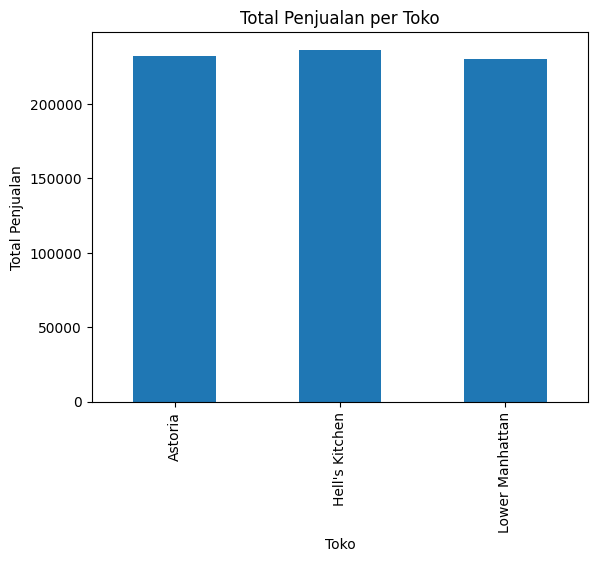

In [12]:
import matplotlib.pyplot as plt

sales_per_store = df.groupby('store')['sales'].sum()

sales_per_store.plot(kind='bar')
plt.title('Total Penjualan per Toko')
plt.xlabel('Toko')
plt.ylabel('Total Penjualan')
plt.show()

penjelasan

In [ ]:
top_products = df.groupby('product')['quantity'].sum()
print(top_products.sort_values(ascending=False))

product
Brewed Chai tea          26250
Gourmet brewed coffee    25973
Barista Espresso         24943
Brewed Black tea         17462
Hot chocolate            17457
Brewed herbal tea        17328
Organic brewed coffee    13012
Drip coffee              12891
Premium brewed coffee    12431
Scone                    10465
Brewed Green tea          8697
Regular syrup             7606
Pastry                    6961
Biscotti                  5788
Sugar free syrup          2905
Housewares                 555
Chai tea                   443
Organic Beans              420
Premium Beans              406
Gourmet Beans              366
Espresso Beans             319
Herbal tea                 305
Black tea                  303
Drinking Chocolate         266
Clothing                   221
Organic Chocolate          221
House blend Beans          183
Green tea                  159
Green beans                134
Name: quantity, dtype: int64


penjelasan

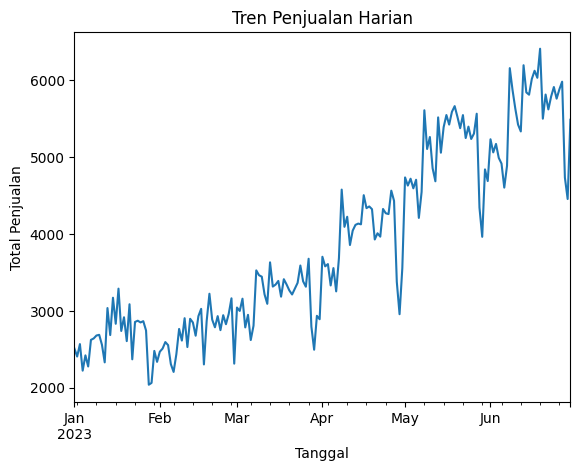

In [14]:
daily_sales = df.groupby('date')['sales'].sum()

daily_sales.plot(kind='line')
plt.title('Tren Penjualan Harian')
plt.xlabel('Tanggal')
plt.ylabel('Total Penjualan')
plt.show()

penjelasan

In [ ]:
print("Rata-rata:", df['sales'].mean())
print("Median:", df['sales'].median())

Rata-rata: 4.6863671906435265
Median: 3.75


penjelasan

In [10]:
Q1 = df['sales'].quantile(0.25)
Q3 = df['sales'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df['sales'] < lower) | (df['sales'] > upper)]
print("Jumlah outlier:", len(outliers))

Jumlah outlier: 3273


penjelasan

In [11]:
df_clean = df[(df['sales'] >= lower) & (df['sales'] <= upper)]

print("Total sebelum:", df['sales'].sum())
print("Total sesudah:", df_clean['sales'].sum())

Total sebelum: 698812.3300000001
Total sesudah: 635374.34


penjelasan